In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

<h1>Section 1: Questions</h1>

<h3>Question 5</h3>

In [2]:
threshold = np.array([1, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0])
confidence = np.array([0.95,0.85,0.8,0.7,0.55,0.45,0.4,0.3,0.2,0.1])
correct = np.array([1,1,0,1,1,0,1,1,0,0])

In [3]:
tpr = np.empty_like(threshold)
fpr = np.empty_like(threshold)
for idx, t in enumerate(threshold):
    tp,fp,tn,fn = (0,0,0,0)
    pred = confidence >= t 
    for i in range(len(pred)):
        if correct[i] == 1:
            if pred[i]:
                tp += 1
            else:
                fn += 1 
        else:
            if pred[i]:
                fp += 1
            else:
                tn += 1
    tpr[idx] = tp/(tp+fn)
    fpr[idx] = fp/(fp+tn)   

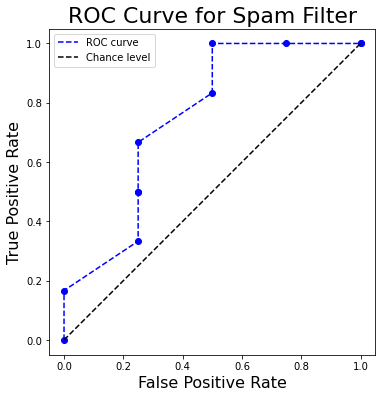

In [4]:
fig, ax = plt.subplots(figsize=(6, 6))
plt.plot(fpr,tpr, "bo")
plt.plot(fpr,tpr, "b--", label= "ROC curve")
plt.plot([0, 1], [0, 1], "k--", label="Chance level")
plt.axis("square")
plt.xlabel("False Positive Rate", fontsize=16)
plt.ylabel("True Positive Rate", fontsize=16)
plt.title("ROC Curve for Spam Filter", fontsize=22)
plt.legend()
plt.show()

In [5]:
print(threshold)
print(fpr)
print(tpr)

[1.  0.9 0.8 0.7 0.6 0.5 0.4 0.3 0.2 0.1 0. ]
[0.   0.   0.25 0.25 0.25 0.25 0.5  0.5  0.75 1.   1.  ]
[0.         0.16666667 0.33333333 0.5        0.5        0.66666667
 0.83333333 1.         1.         1.         1.        ]


<h1>Section 2: Programming</h1>

In [2]:
from scipy import stats

In [3]:
class kNN:
    def __init__(self, k=1):
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        m = X_test.shape[0]
        n = self.X_train.shape[0]
        dist = np.empty((m, n))                       # m by n array
        for i in range(m):
            dist[i] = np.sqrt(np.sum(np.square(X_test[i] - self.X_train), axis = -1))            
        p = np.argsort(dist)
        k_nearest_labels = self.y_train[p][:,:self.k]
        return stats.mode(k_nearest_labels, axis = 1)[0].reshape(-1)


In [68]:
class logReg:
    def __init__(self, num_features):
        self.num_params = num_features + 1
        self.theta = np.zeros(self.num_params)
    
    def __sigmoid__(self, x):
        return 1 / (1 + np.exp((-1)*x))
    
    
    def fit(self, X_train, y_train, alpha = 0.1, epochs = 1000):
        
        self.theta = np.zeros(self.num_params)
        X_train = np.column_stack((np.ones(len(y_train)), X_train))
        for e in range(epochs):   
#             rng = np.random.default_rng()
#             p = rng.permutation(len(y_train))
            p =  np.random.permutation(len(y_train))
            X_train = X_train[p] 
            y_train = y_train[p]
            
            for i in range(len(y_train)):
                dot = np.dot(self.theta, X_train[i])
                y_hat = self.__sigmoid__(dot)
                grad = (y_hat - y_train[i]) * X_train[i]
                self.theta = self.theta - alpha * grad
    
   
    def predict(self, X_test):
        X_test = np.column_stack((np.ones(X_test.shape[0]), X_test))
        prob = self.__sigmoid__(X_test @ self.theta)
        ans = prob > 0.5
        ans.dtype = np.int8
        return ans
    
    def predict_prob(self, X_test):
        X_test = np.column_stack((np.ones(X_test.shape[0]), X_test))
        prob = self.__sigmoid__(X_test @ self.theta)
        return prob
        
        
        

<h3>Question 1</h3>

In [6]:
data = np.loadtxt('data/D2z.txt')
X_train = data[:,:-1]
y_train = data[:,-1]

In [7]:
model = kNN()
model.fit(X_train, y_train)

In [8]:
xx, yy = np.meshgrid(np.linspace(-2, 2, 41), np.linspace(-2, 2, 41))

In [9]:
x_input = np.column_stack((xx.flatten(), yy.flatten()))
y_pred = model.predict(x_input)
y_pred = y_pred.reshape(xx.shape)

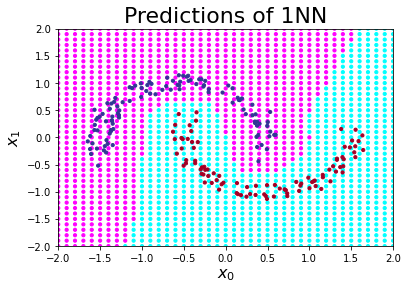

In [46]:
plt.scatter(xx.flatten(), yy.flatten(), c=y_pred, s=10, cmap='cool')
plt.scatter(X_train[:,0], X_train[:, 1], c=y_train, s=10, cmap=plt.cm.RdYlBu)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('Predictions of 1NN', fontsize=22)
plt.xlabel(r'$x_0$', fontsize = 16)
plt.ylabel(r'$x_1$', fontsize = 16)
plt.show()

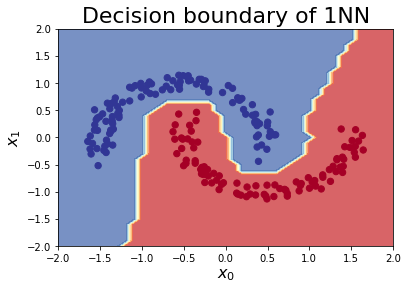

In [12]:
plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7 )
plt.scatter(X_train[:,0], X_train[:, 1], c=y_train, s=40, cmap=plt.cm.RdYlBu)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('Decision boundary of 1NN', fontsize=22)
plt.xlabel(r'$x_0$', fontsize = 16)
plt.ylabel(r'$x_1$', fontsize = 16)
plt.show()

<h3>Question 2</h3>

In [10]:
import pandas as pd
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

In [11]:
data = pd.read_csv('data/emails.csv')

In [12]:
data.head(5)

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [14]:
data_arr = data.iloc[:,1:].values
data_arr.shape

(5000, 3001)

In [15]:
acc_list = []
prec_list = []
rec_list = []

In [16]:
for i in range(5):
    model = kNN()
    test_mask = np.full(data_arr.shape[0], False)
    test_mask[i*1000 : (i+1)*1000] = True
    X_test = data_arr[test_mask, :-1]
    y_test = data_arr[test_mask, -1]
    X_train = data_arr[~test_mask, :-1]
    y_train = data_arr[~test_mask, -1]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    prec, rec, _, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
    acc = accuracy_score(y_test, y_pred)
    acc_list.append(acc)
    prec_list.append(prec)
    rec_list.append(rec)


In [18]:
for i in range(5):
    print(f"For Fold {i+1}:       accuracy = {acc_list[i]},        precision = {prec_list[i]},       recall = {rec_list[i]}")

For Fold 1:       accuracy = 0.825,        precision = 0.6536312849162011,       recall = 0.8210526315789474
For Fold 2:       accuracy = 0.855,        precision = 0.6896551724137931,       recall = 0.8664259927797834
For Fold 3:       accuracy = 0.863,        precision = 0.7220543806646526,       recall = 0.8415492957746479
For Fold 4:       accuracy = 0.854,        precision = 0.7215568862275449,       recall = 0.8197278911564626
For Fold 5:       accuracy = 0.775,        precision = 0.6051948051948052,       recall = 0.761437908496732


<h3>Question 3</h3>

From-scratch implementation done at the start of Section 2 (see above)

In [58]:
acc_list = []
prec_list = []
rec_list = []

In [59]:
for i in range(5):
    model = logReg(3000)
    test_mask = np.full(data_arr.shape[0], False)
    test_mask[i*1000 : (i+1)*1000] = True
    X_test = data_arr[test_mask, :-1]
    y_test = data_arr[test_mask, -1]
    X_train = data_arr[~test_mask, :-1]
    y_train = data_arr[~test_mask, -1]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    prec, rec, _, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
    acc = accuracy_score(y_test, y_pred)
    acc_list.append(acc)
    prec_list.append(prec)
    rec_list.append(rec)

In [60]:
for i in range(5):
    print(f"For Fold {i+1}:       accuracy = {acc_list[i]},        precision = {prec_list[i]},       recall = {rec_list[i]}")

For Fold 1:       accuracy = 0.966,        precision = 0.919732441471572,       recall = 0.9649122807017544
For Fold 2:       accuracy = 0.966,        precision = 0.9386281588447654,       recall = 0.9386281588447654
For Fold 3:       accuracy = 0.956,        precision = 0.9195804195804196,       recall = 0.926056338028169
For Fold 4:       accuracy = 0.958,        precision = 0.9256756756756757,       recall = 0.9319727891156463
For Fold 5:       accuracy = 0.938,        precision = 0.8885350318471338,       recall = 0.9117647058823529


<h3>Question 4</h3>

The from scratch implementation takes too long for the below code to execute (tried to keep kNN code as vectorized as possible, but had to add 1 for loop, because using broadcasting to avoid it caused a memory error - too much memory needed). Hence, using sklearn implementation for Q4 and Q5.

In [61]:
from sklearn.neighbors import KNeighborsClassifier

In [81]:
avg_acc = []
k_list = [1, 3, 5, 7, 10]
for k in k_list:    
    acc_list = []
#     prec_list = []
#     rec_list = []

    for i in range(5):
        model = KNeighborsClassifier(n_neighbors=k)
        test_mask = np.full(data_arr.shape[0], False)
        test_mask[i*1000 : (i+1)*1000] = True
        X_test = data_arr[test_mask, :-1]
        y_test = data_arr[test_mask, -1]
        X_train = data_arr[~test_mask, :-1]
        y_train = data_arr[~test_mask, -1]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
#         prec, rec, _, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
        acc = accuracy_score(y_test, y_pred)
        acc_list.append(acc)
#         prec_list.append(prec)
#         rec_list.append(rec)
    
    acc_list = np.array(acc_list)
    avg = np.mean(acc_list)
    print(f"For k = {k}:     average accuracy = {avg} \n")
    avg_acc.append(avg)

For k = 1:     average accuracy = 0.834 

For k = 3:     average accuracy = 0.8416 

For k = 5:     average accuracy = 0.8427999999999999 

For k = 7:     average accuracy = 0.8458 

For k = 10:     average accuracy = 0.8554 



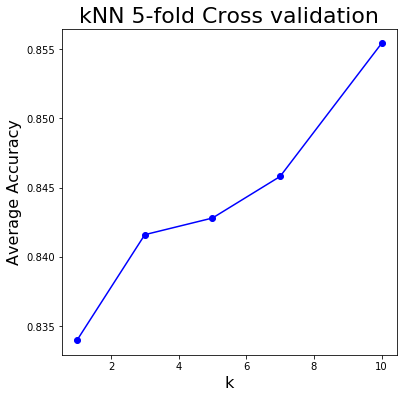

In [87]:
fig, ax = plt.subplots(figsize=(6, 6))
plt.plot(k_list, avg_acc, "bo")
plt.plot(k_list, avg_acc, "b-")
# plt.axis("square")
plt.xlabel("k", fontsize=16)
plt.ylabel("Average Accuracy", fontsize=16)
plt.title("kNN 5-fold Cross validation", fontsize=22)
plt.show()

<h3>Question 5</h3>

In [73]:
from sklearn.metrics import roc_curve

In [64]:
i = 4
test_mask = np.full(data_arr.shape[0], False)
test_mask[i*1000 : (i+1)*1000] = True
X_test = data_arr[test_mask, :-1]
y_test = data_arr[test_mask, -1]
X_train = data_arr[~test_mask, :-1]
y_train = data_arr[~test_mask, -1]

In [65]:
m1 = KNeighborsClassifier(n_neighbors=5)
m1.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [70]:
m2 = logReg(3000)
m2.fit(X_train, y_train)

In [75]:
scores_1 = m1.predict_proba(X_test)[:,1]

In [71]:
scores_2 = m2.predict_prob(X_test)

In [76]:
fpr1, tpr1, _ = roc_curve(y_test, scores_1)
fpr2, tpr2, _ = roc_curve(y_test, scores_2)

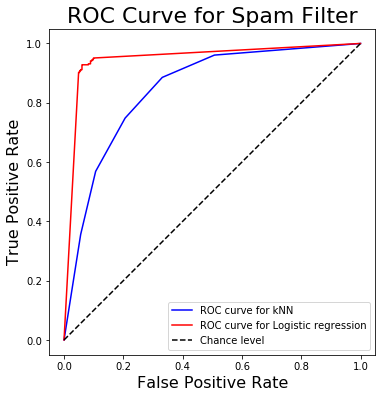

In [80]:
fig, ax = plt.subplots(figsize=(6, 6))
plt.plot(fpr1,tpr1, "b-", label= "ROC curve for kNN")
plt.plot(fpr2,tpr2, "r-", label= "ROC curve for Logistic regression")
plt.plot([0, 1], [0, 1], "k--", label="Chance level")
plt.axis("square")
plt.xlabel("False Positive Rate", fontsize=16)
plt.ylabel("True Positive Rate", fontsize=16)
plt.title("ROC Curve for Spam Filter", fontsize=22)
plt.legend()
plt.show()